In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams["font.size"] = 14
import warnings
warnings.simplefilter("ignore")
import datetime as dt
from scipy import io
from joblib import load

grafana = pd.read_csv("../data/merged_grafana.csv")
grafana["timestamp"] = grafana["timestamp"].apply(pd.to_datetime)
grafana.head()

,timestamp,user_pool_cluster_utilization,current_users,user_node_memory,core_node_memory,active_users,non_running_user_pods,500_503_responses
0,2019-09-11 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-09-11 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-09-11 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-09-11 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-09-11 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import train_test_split

In [11]:
train, test = train_test_split(grafana)

In [13]:
X_train = train.drop(["timestamp", "500_503_responses"], axis=1).values
y_train = train["500_503_responses"].values

X_test = test.drop(["timestamp", "500_503_responses"], axis=1).values
y_test = test["500_503_responses"].values

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
model.score(X_train, y_train)

0.573426971156861

In [17]:
model.score(X_test, y_test)

0.589295750740761

In [21]:
model.predict([np.zeros(6)])

array([1.10418603])

In [22]:
from sklearn.feature_selection import RFECV

In [23]:
cv = RFECV(LinearRegression())

In [24]:
cv.fit(X_train, y_train)

RFECV(cv='warn',
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
   min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [43]:
cv.support_

array([ True,  True, False,  True,  True,  True])

In [46]:
X_feat = X_train[:,np.arange(X_train.shape[1])[cv.support_]]
Xt_feat = X_test[:,np.arange(X_test.shape[1])[cv.support_]]

In [47]:
model2 = LinearRegression()
model2.fit(X_feat, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
model2.score(X_feat, y_train)

0.5727239169808306

In [49]:
model2.score(Xt_feat, y_test)

0.5881332359924902

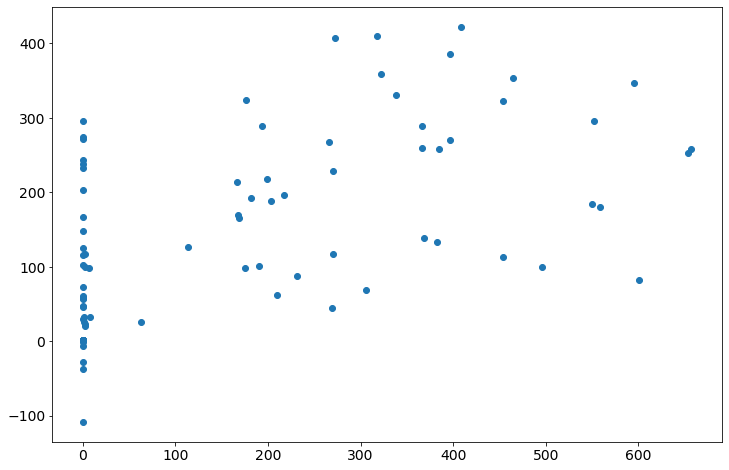

In [51]:
plt.scatter(y_test, model2.predict(Xt_feat))